<a href="https://colab.research.google.com/github/spacegoalex/SoftwareEngineer/blob/main/LokasiStrategis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# -- Memuat dan Mempersiapkan Data --
df = pd.read_csv('Indonesian Salary by Region (2011-2022).csv')
df.columns
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  416 non-null    object
 1   SALARY  416 non-null    int64 
 2   YEAR    416 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.9+ KB


,0
REGION,0
SALARY,0
YEAR,0


In [2]:
df[df['YEAR'] >= 1997]
df.sort_values('YEAR')

summary_df = df.groupby('REGION').agg(
    Rata_rata_Gaji=('SALARY', 'mean'),
    Gaji_Terendah=('SALARY', 'min'),
    Gaji_Tertinggi=('SALARY', 'max')
).reset_index()
summary_df_sorted = summary_df.sort_values(by='REGION')

print("Berikut adalah hasil statistik gaji per provinsi (1997-2022):")
print(summary_df_sorted.to_string(index=False))

Berikut adalah hasil statistik gaji per provinsi (1997-2022):
              REGION  Rata_rata_Gaji  Gaji_Terendah  Gaji_Tertinggi
                ACEH    2.306819e+06        1350000         3166460
                BALI    1.824725e+06         890000         2516971
              BANTEN    1.803563e+06        1000000         2501203
            BENGKULU    1.699951e+06         815000         2888564
       DI YOGYAKARTA    1.273880e+06         808000         1840951
         DKI JAKARTA    3.112514e+06        1290000         4452724
           GORONTALO    1.881172e+06         762500         2800580
           INDONESIA    1.951450e+06         988829         2672371
               JAMBI    1.985773e+06        1028000         3230023
          JAWA BARAT    1.392296e+06         732000         2250000
         JAWA TENGAH    1.234372e+06         675000         1813011
          JAWA TIMUR    1.281027e+06         705000         1891567
    KALIMANTAN BARAT    1.734744e+06         802500   

In [3]:
region_jawa = ['DKI JAKARTA', 'BANTEN', 'JAWA BARAT', 'JAWA TENGAH', 'DI YOGYAKARTA', 'JAWA TIMUR']
summary_jawa = df[
    (df['REGION'].isin(region_jawa)) & (df['YEAR'] >= 2010)
]
jawa_final = summary_jawa.groupby('REGION').agg(
    Rata_rata_Gaji=('SALARY', 'mean'),
    Gaji_Terendah=('SALARY', 'min'),
    Gaji_Tertinggi=('SALARY', 'max')
).reset_index()
jawa_final_sorted = jawa_final.sort_values(by='REGION')
print("Berikut adalah hasil statistik gaji Region Jawa (2010-2022):")
print(jawa_final_sorted.to_string(index=False))

print()
print()

region_sumatera = ["ACEH", "SUMATERA UTARA", "SUMATERA BARAT", "RIAU", "KEP. RIAU", "JAMBI", "BENGKULU", "SUMATERA SELATAN", "KEP. BANGKA BELITUNG", "LAMPUNG"]
summary_sumatera = df[
    (df['REGION'].isin(region_sumatera)) & (df['YEAR'] >= 2010)
]
sumatera_final = summary_sumatera.groupby('REGION').agg(
    Rata_rata_Gaji=('SALARY', 'mean'),
    Gaji_Terendah=('SALARY', 'min'),
    Gaji_Tertinggi=('SALARY', 'max')
).reset_index()
sumatera_final_sorted = sumatera_final.sort_values(by='REGION')
print("Berikut adalah hasil statistik gaji Region Sumatera (2010-2022):")
print(sumatera_final_sorted.to_string(index=False))

print()
print()

region_kalimantan = ["KALIMANTAN BARAT", "KALIMANTAN UTARA", "KALIMANTAN TIMUR", "KALIMANTAN SELATAN","KALIMANTAN TENGAH"]
summary_kalimantan = df[
    (df['REGION'].isin(region_kalimantan)) & (df['YEAR'] >= 2010)
]
kalimantan_final = summary_kalimantan.groupby('REGION').agg(
    Rata_rata_Gaji=('SALARY', 'mean'),
    Gaji_Terendah=('SALARY', 'min'),
    Gaji_Tertinggi=('SALARY', 'max')
).reset_index()
kalimantan_final_sorted = kalimantan_final.sort_values(by='REGION')
print("Berikut adalah hasil statistik gaji Region Kalimantan (2010-2022):")
print(kalimantan_final_sorted.to_string(index=False))

print()
print()

region_sulawesi = ["SULAWESI BARAT", "SULAWESI UTARA", "SULAWESI TENGGARA", "SULAWESI SELATAN","SULAWESI TENGAH", "GORONTALO"]
summary_sulawesi = df[
    (df['REGION'].isin(region_sulawesi)) & (df['YEAR'] >= 2010)
]
sulawesi_final = summary_sulawesi.groupby('REGION').agg(
    Rata_rata_Gaji=('SALARY', 'mean'),
    Gaji_Terendah=('SALARY', 'min'),
    Gaji_Tertinggi=('SALARY', 'max')
).reset_index()
sulawesi_final_sorted = sulawesi_final.sort_values(by='REGION')
print("Berikut adalah hasil statistik gaji Region Sulawesi (2010-2022):")
print(sulawesi_final_sorted.to_string(index=False))

print()
print()

region_sunda_kecil = ["BALI", "NUSA TENGGARA BARAT", "NUSA TENGGARA TIMUR"]
summary_sunda_kecil = df[
    (df['REGION'].isin(region_sunda_kecil)) & (df['YEAR'] >= 2010)
]
sunda_kecil_final = summary_sunda_kecil.groupby('REGION').agg(
    Rata_rata_Gaji=('SALARY', 'mean'),
    Gaji_Terendah=('SALARY', 'min'),
    Gaji_Tertinggi=('SALARY', 'max')
).reset_index()
sunda_kecil_final_sorted = sunda_kecil_final.sort_values(by='REGION')
print("Berikut adalah hasil statistik gaji Region Sunda Kecil (2010-2022):")
print(sunda_kecil_final_sorted.to_string(index=False))

print()
print()

region_maluku = ["MALUKU", "MALUKU UTARA"]
summary_maluku = df[
    (df['REGION'].isin(region_maluku)) & (df['YEAR'] >= 2010)
]
maluku_final = summary_maluku.groupby('REGION').agg(
    Rata_rata_Gaji=('SALARY', 'mean'),
    Gaji_Terendah=('SALARY', 'min'),
    Gaji_Tertinggi=('SALARY', 'max')
).reset_index()
maluku_final_sorted = maluku_final.sort_values(by='REGION')
print("Berikut adalah hasil statistik gaji Region Maluku (2010-2022):")
print(maluku_final_sorted.to_string(index=False))

print()
print()

region_papua = ["PAPUA", "PAPUA BARAT"]
summary_papua = df[
    (df['REGION'].isin(region_papua)) & (df['YEAR'] >= 2010)
]
papua_final = summary_papua.groupby('REGION').agg(
    Rata_rata_Gaji=('SALARY', 'mean'),
    Gaji_Terendah=('SALARY', 'min'),
    Gaji_Tertinggi=('SALARY', 'max')
).reset_index()
papua_final_sorted = papua_final.sort_values(by='REGION')
print("Berikut adalah hasil statistik gaji Region Papua (2010-2022):")
print(papua_final_sorted.to_string(index=False))

Berikut adalah hasil statistik gaji Region Jawa (2010-2022):
       REGION  Rata_rata_Gaji  Gaji_Terendah  Gaji_Tertinggi
       BANTEN    1.803563e+06        1000000         2501203
DI YOGYAKARTA    1.273880e+06         808000         1840951
  DKI JAKARTA    3.112514e+06        1290000         4452724
   JAWA BARAT    1.392296e+06         732000         2250000
  JAWA TENGAH    1.234372e+06         675000         1813011
   JAWA TIMUR    1.281027e+06         705000         1891567


Berikut adalah hasil statistik gaji Region Sumatera (2010-2022):
              REGION  Rata_rata_Gaji  Gaji_Terendah  Gaji_Tertinggi
                ACEH    2.306819e+06        1350000         3166460
            BENGKULU    1.699951e+06         815000         2888564
               JAMBI    1.985773e+06        1028000         3230023
KEP. BANGKA BELITUNG    2.204769e+06        1024000         3264881
           KEP. RIAU    2.127556e+06         975000         3050172
             LAMPUNG    1.770993e+06 

/tmp/ipython-input-4-2860263586.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')


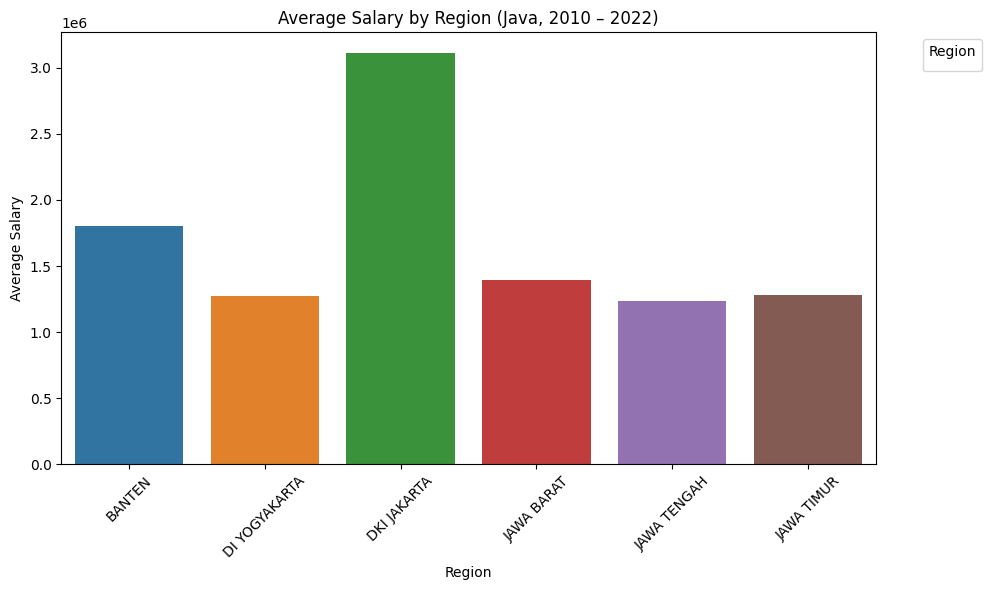

/tmp/ipython-input-4-2860263586.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')


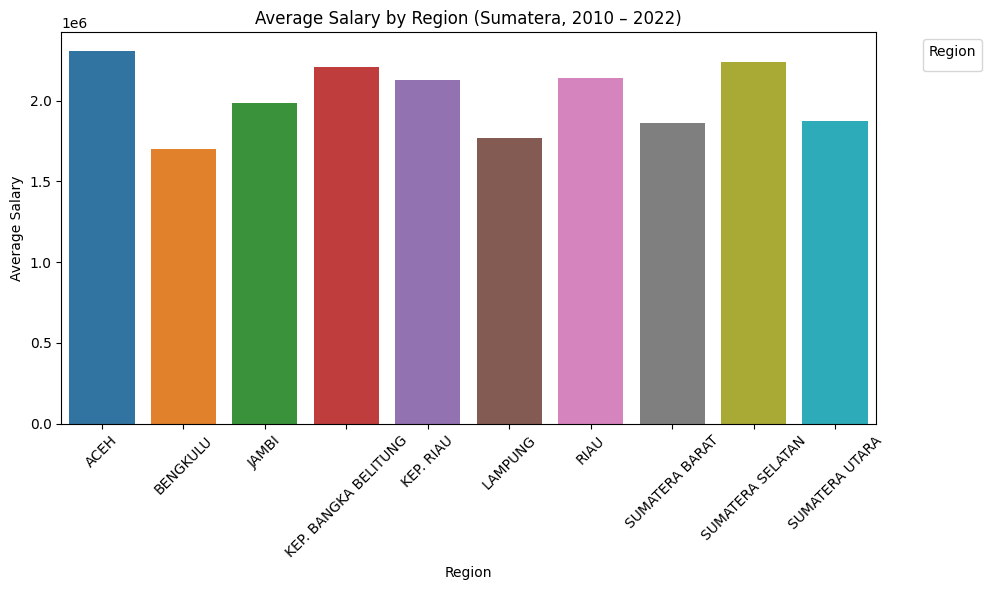

/tmp/ipython-input-4-2860263586.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')


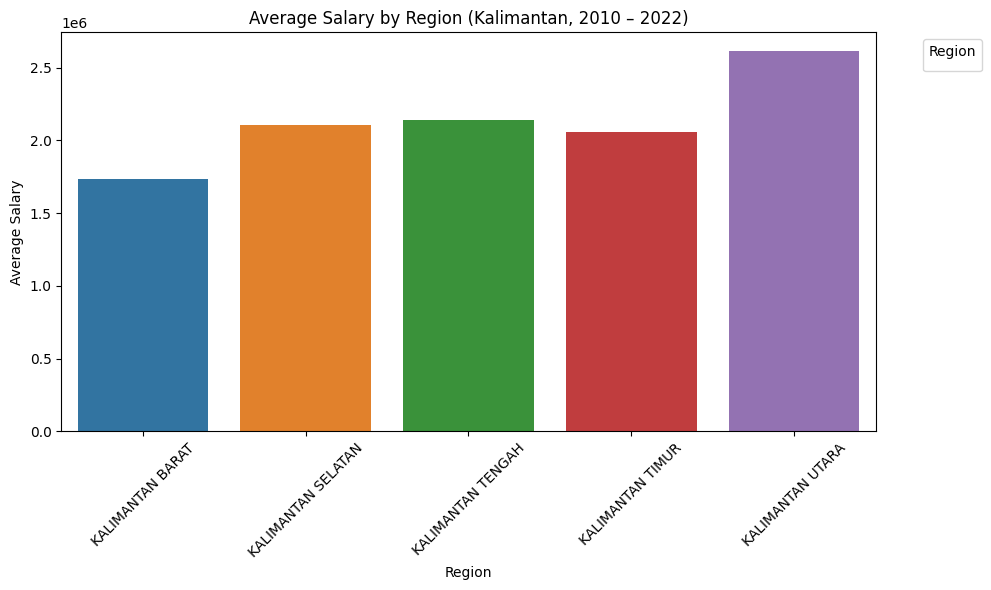

/tmp/ipython-input-4-2860263586.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')


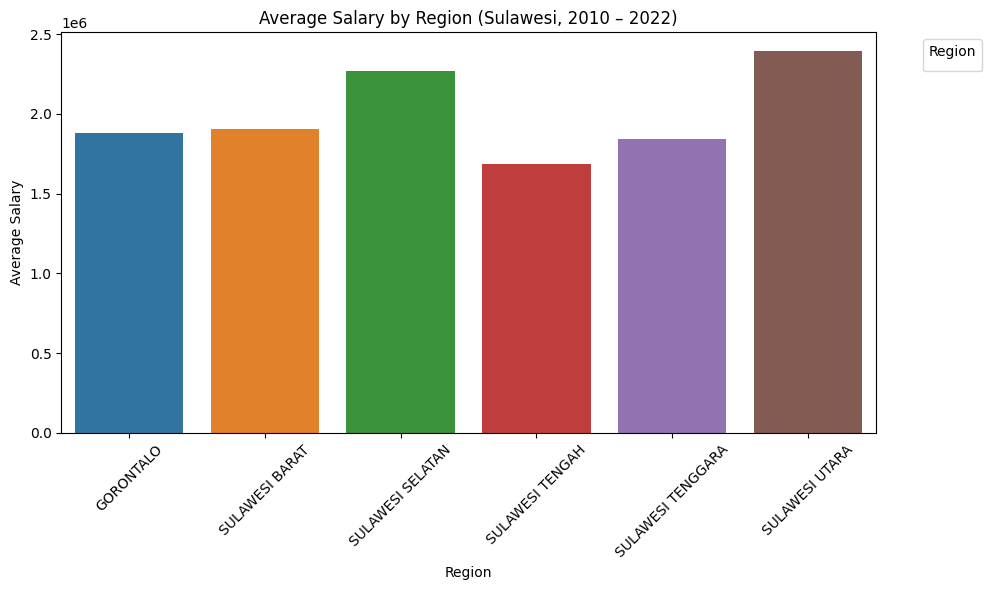

/tmp/ipython-input-4-2860263586.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')


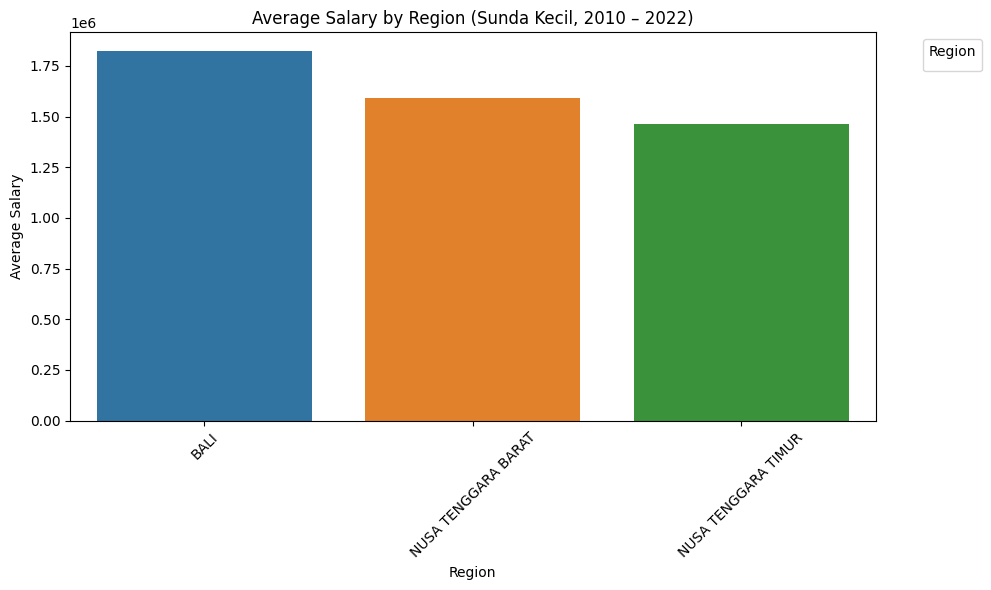

/tmp/ipython-input-4-2860263586.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')


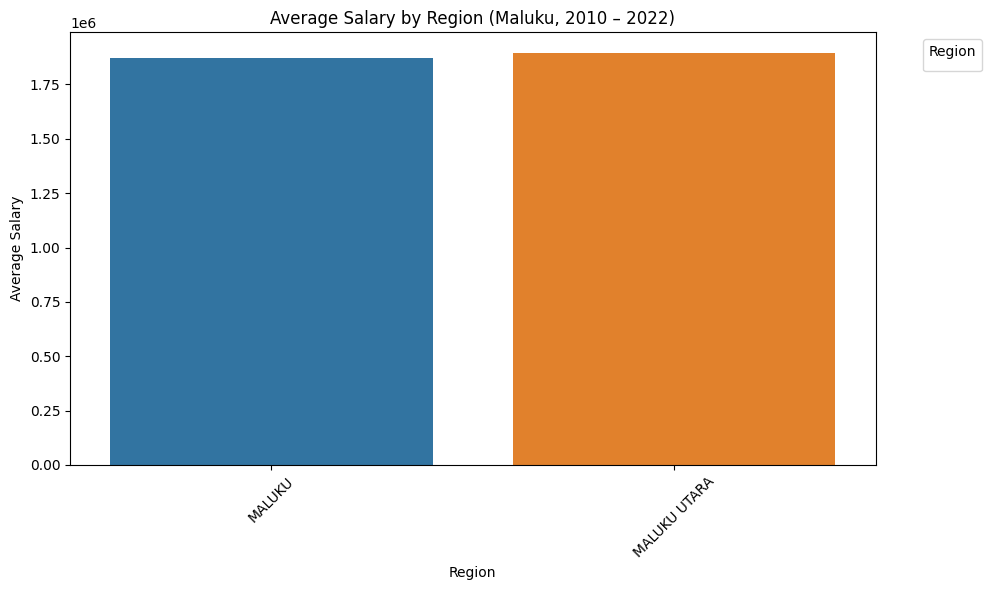

/tmp/ipython-input-4-2860263586.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')


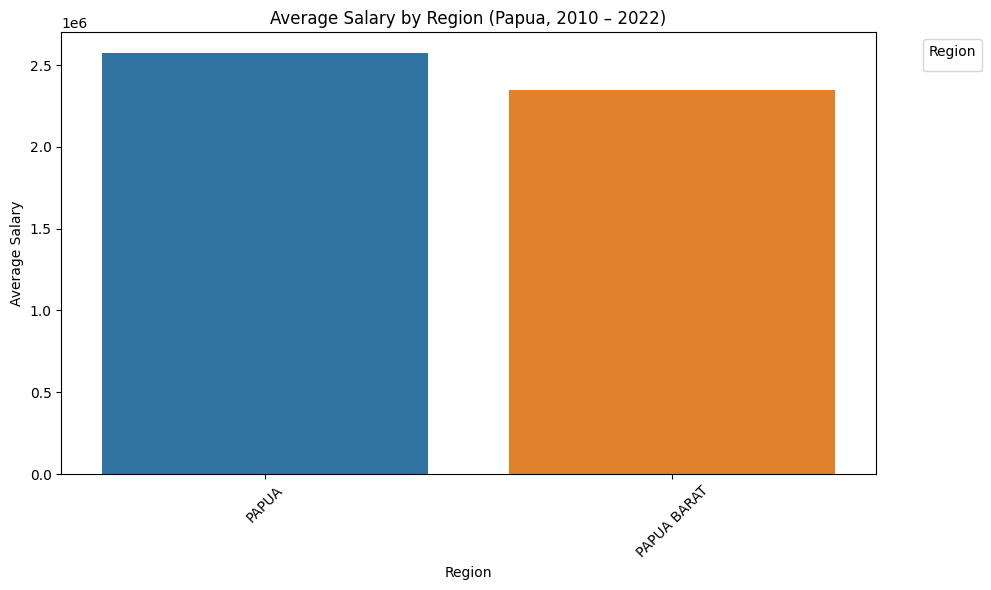

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(data=jawa_final_sorted, x='REGION', y='Rata_rata_Gaji', hue='REGION', dodge=False)
plt.xticks(rotation=45)
plt.title("Average Salary by Region (Java, 2010 – 2022)")
plt.xlabel("Region")
plt.ylabel("Average Salary")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print()
print()


plt.figure(figsize=(10, 6))
sns.barplot(data=sumatera_final_sorted, x='REGION', y='Rata_rata_Gaji', hue='REGION', dodge=False)
plt.xticks(rotation=45)
plt.title("Average Salary by Region (Sumatera, 2010 – 2022)")
plt.xlabel("Region")
plt.ylabel("Average Salary")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print()
print()

plt.figure(figsize=(10, 6))
sns.barplot(data=kalimantan_final_sorted, x='REGION', y='Rata_rata_Gaji', hue='REGION', dodge=False)
plt.xticks(rotation=45)
plt.title("Average Salary by Region (Kalimantan, 2010 – 2022)")
plt.xlabel("Region")
plt.ylabel("Average Salary")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print()
print()

plt.figure(figsize=(10, 6))
sns.barplot(data=sulawesi_final_sorted, x='REGION', y='Rata_rata_Gaji', hue='REGION', dodge=False)
plt.xticks(rotation=45)
plt.title("Average Salary by Region (Sulawesi, 2010 – 2022)")
plt.xlabel("Region")
plt.ylabel("Average Salary")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print()
print()

plt.figure(figsize=(10, 6))
sns.barplot(data=sunda_kecil_final_sorted, x='REGION', y='Rata_rata_Gaji', hue='REGION', dodge=False)
plt.xticks(rotation=45)
plt.title("Average Salary by Region (Sunda Kecil, 2010 – 2022)")
plt.xlabel("Region")
plt.ylabel("Average Salary")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print()
print()

plt.figure(figsize=(10, 6))
sns.barplot(data=maluku_final_sorted, x='REGION', y='Rata_rata_Gaji', hue='REGION', dodge=False)
plt.xticks(rotation=45)
plt.title("Average Salary by Region (Maluku, 2010 – 2022)")
plt.xlabel("Region")
plt.ylabel("Average Salary")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print()
print()

plt.figure(figsize=(10, 6))
sns.barplot(data=papua_final_sorted, x='REGION', y='Rata_rata_Gaji', hue='REGION', dodge=False)
plt.xticks(rotation=45)
plt.title("Average Salary by Region (Papua, 2010 – 2022)")
plt.xlabel("Region")
plt.ylabel("Average Salary")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-5-1865157532.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rata_rata_df, x='Region', y='Rata_rata_Gaji', palette='viridis')


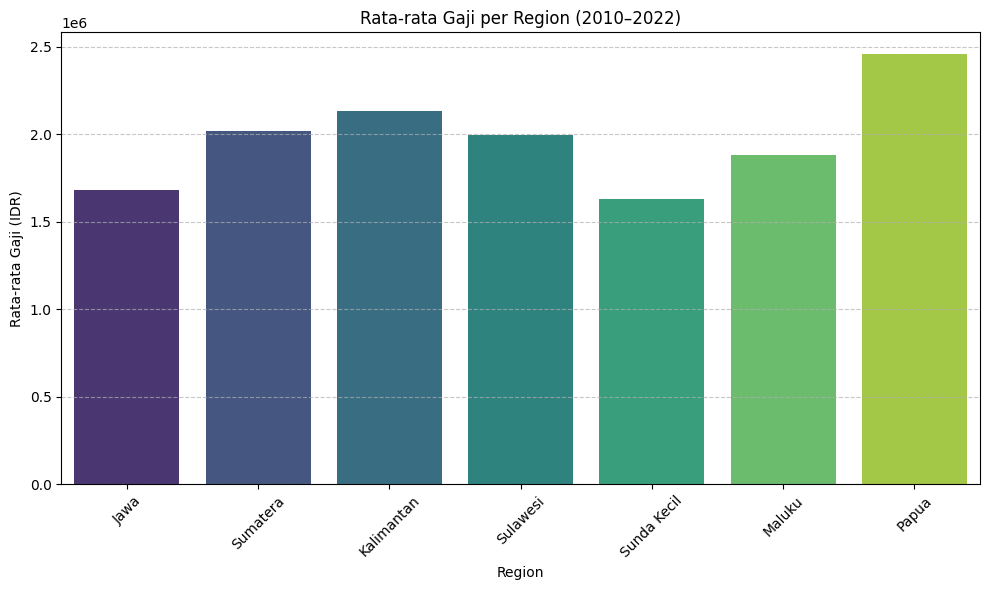

In [5]:
rata_rata_per_region = {
    'Jawa': jawa_final_sorted['Rata_rata_Gaji'].mean(),
    'Sumatera': sumatera_final_sorted['Rata_rata_Gaji'].mean(),
    'Kalimantan': kalimantan_final_sorted['Rata_rata_Gaji'].mean(),
    'Sulawesi': sulawesi_final_sorted['Rata_rata_Gaji'].mean(),
    'Sunda Kecil': sunda_kecil_final_sorted['Rata_rata_Gaji'].mean(),
    'Maluku': maluku_final_sorted['Rata_rata_Gaji'].mean(),
    'Papua': papua_final_sorted['Rata_rata_Gaji'].mean()
}

# Konversi ke DataFrame
rata_rata_df = pd.DataFrame(list(rata_rata_per_region.items()), columns=['Region', 'Rata_rata_Gaji'])

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=rata_rata_df, x='Region', y='Rata_rata_Gaji', palette='viridis')

# Styling
plt.title('Rata-rata Gaji per Region (2010–2022)')
plt.xlabel('Region')
plt.ylabel('Rata-rata Gaji (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Menghitung YoY kenaikan gaji per tahun per region dari tahun 2010 ke 2022
df_filtered = df[df['YEAR'].between(2010, 2022)].copy()

# Define the assign_group function
def assign_group(region):
    if region in region_jawa:
        return 'Jawa'
    elif region in region_sumatera:
        return 'Sumatera'
    elif region in region_kalimantan:
        return 'Kalimantan'
    elif region in region_sulawesi:
        return 'Sulawesi'
    elif region in region_sunda_kecil:
        return 'Sunda Kecil'
    elif region in region_maluku:
        return 'Maluku'
    elif region in region_papua:
        return 'Papua'
    else:
        return 'Other'

if 'GROUP' not in df_filtered.columns:
    df_filtered['GROUP'] = df_filtered['REGION'].apply(assign_group)

region_year_avg = df_filtered.groupby(['GROUP', 'YEAR'])['SALARY'].mean().reset_index()

region_year_avg['YoY_Growth_%'] = region_year_avg.groupby('GROUP')['SALARY'].pct_change() * 100

print("Persentase Kenaikan YoY Gaji per Region (2011 – 2022):")
print(region_year_avg.dropna().to_string(index=False))

Persentase Kenaikan YoY Gaji per Region (2011 – 2022):
      GROUP  YEAR       SALARY  YoY_Growth_%
       Jawa  2012 9.589683e+05     10.437812
       Jawa  2013 1.143894e+06     19.283814
       Jawa  2014 1.277417e+06     11.672643
       Jawa  2015 1.366417e+06      6.967186
       Jawa  2016 1.672083e+06     22.369946
       Jawa  2017 1.800033e+06      7.652121
       Jawa  2018 1.956816e+06      8.709997
       Jawa  2019 2.113952e+06      8.030205
       Jawa  2020 2.293850e+06      8.510000
       Jawa  2021 2.353382e+06      2.595281
       Jawa  2022 2.390157e+06      1.562673
 Kalimantan  2012 1.157365e+06     11.631775
 Kalimantan  2013 1.425675e+06     23.182860
 Kalimantan  2014 1.652571e+06     15.915005
 Kalimantan  2015 1.875724e+06     13.503354
 Kalimantan  2016 2.043720e+06      8.956351
 Kalimantan  2017 1.812448e+06    -11.316216
 Kalimantan  2018 2.405222e+06     32.705692
 Kalimantan  2019 2.607948e+06      8.428577
 Kalimantan  2020 2.832495e+06      8.610102
